<a href="https://colab.research.google.com/github/SMMiroE/Herramientas-de-calculo-y-simulacion-de-procesos-dinamicos/blob/main/SMMIRO_Modulo_1_Semana_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Instalar Octave (si aún no está instalado en tu entorno de Colab)
!apt install octave
print("Octave instalado correctamente.")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave is already the newest version (6.4.0-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Octave instalado correctamente.


In [53]:
# Guardar el script de Octave en un archivo llamado avion.m
octave_script = """
% Script en Octave para la simulación del modelo de vuelo longitudinal linealizado

% --- Parámetros del modelo ---
omega = 0.2;    % Frecuencia natural (rad/s)
a = 0.01;       % Coeficiente de amortiguamiento
b = 2;          % Constante de control
c = 50;        % Velocidad de vuelo (m/s)

% --- Parámetros de la simulación ---
h = 1e-3;                   % Paso de tiempo (s)
t_final = 20;               % Tiempo de simulación (s)
t = 0:h:t_final;           % Vector de tiempo
n_steps = length(t);       % Número de pasos

% --- Matrices del sistema lineal ---
A = [-a, a, 0, 0;
     0, 0, 1, 0;
     omega^2, -omega^2, 0, 0;
     c, 0, 0, 0];
B = [0; 0; omega^2 * b; 0];

%---Autovalores de la matriz A ---
eigenvalues_A = eig(A);
disp('Autovalores de la matriz A:');
disp(eigenvalues_A);

% --- Condición inicial ---
x0 = [0.1;    % alpha(0) - Angulo de ataque inicial
      0;      % phi(0)   - Angulo de cabeceo inicial
      0;      % phi_dot(0) - Velocidad angular de cabeceo inicial
      0];      % h(0)     - Altitud inicial

% --- Inicialización de la matriz de estados ---
x = zeros(4, n_steps);
x(:, 1) = x0;

% --- Entrada de control (nula para evaluar el comportamiento inherente) ---
u = zeros(1, n_steps);

% --- Simulación con el método de Euler hacia adelante ---
for n = 1:(n_steps - 1)
    x(:, n+1) = x(:, n) + h * (A * x(:, n) + B * u(:, n));
end

% --- Guardar los resultados en un archivo .mat ---
save('simulacion_vuelo.mat', 't', 'x', 'eigenvalues_A', '-v7');
"""

with open('avion.m', 'w') as f:
    f.write(octave_script)

print("Archivo avion.m guardado.")

Archivo avion.m guardado.


In [54]:
# Ejecutar el script de Octave y guardar los resultados en simulacion_vuelo.mat
!octave -W avion.m
print("Simulación de Octave completada. Resultados guardados en simulacion_vuelo.mat")

Autovalores de la matriz A:
        0 +      0i
  -0.0050 + 0.1999i
  -0.0050 - 0.1999i
        0 +      0i
Simulación de Octave completada. Resultados guardados en simulacion_vuelo.mat


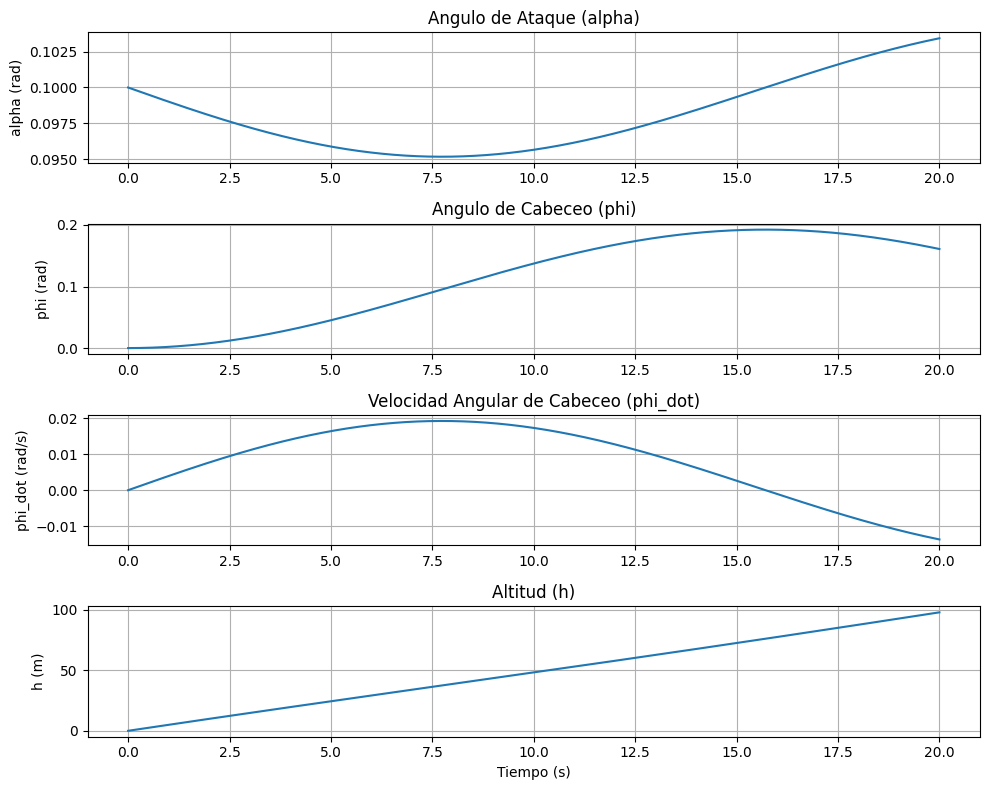


Autovalores de la matriz A:
[[ 0.   +0.j        ]
 [-0.005+0.19993749j]
 [-0.005-0.19993749j]
 [ 0.   +0.j        ]]


In [55]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos desde el archivo .mat
data = scipy.io.loadmat('simulacion_vuelo.mat')
t = data['t'].flatten()
x = data['x']
eigenvalues_A = data['eigenvalues_A']

# Extraer las variables de estado
alpha = x[0, :]
phi = x[1, :]
phi_dot = x[2, :]
h = x[3, :]

# Crear la figura con subgráficos
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(t, alpha)
plt.ylabel('alpha (rad)')
plt.title('Angulo de Ataque (alpha)')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, phi)
plt.ylabel('phi (rad)')
plt.title('Angulo de Cabeceo (phi)')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, phi_dot)
plt.ylabel('phi_dot (rad/s)')
plt.title('Velocidad Angular de Cabeceo (phi_dot)')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, h)
plt.ylabel('h (m)')
plt.xlabel('Tiempo (s)')
plt.title('Altitud (h)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimir los autovalores
print("\nAutovalores de la matriz A:")
print(eigenvalues_A)